In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('crime.csv') #,nrows =222793 untuk slice

df


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
222789,E01003401,Merton,Other Notifiable Offences,Going Equipped,0,2012,11
222790,E01003127,Lambeth,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2014,6
222791,E01000073,Barking and Dagenham,Burglary,Burglary in a Dwelling,0,2015,3
222792,E01000890,Camden,Theft and Handling,Theft/Taking of Pedal Cycle,1,2015,9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222794 entries, 0 to 222793
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   lsoa_code       222794 non-null  object
 1   borough         222794 non-null  object
 2   major_category  222794 non-null  object
 3   minor_category  222794 non-null  object
 4   value           222794 non-null  int64 
 5   year            222794 non-null  int64 
 6   month           222794 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.5+ MB


In [3]:
df.drop(['lsoa_code','value','month'],axis=1, inplace = True)
df.rename(columns={'borough':'district'}, inplace = True)
pd.to_datetime(df.year, format='%Y' )


df.head()


,district,major_category,minor_category,year
0,Croydon,Burglary,Burglary in Other Buildings,2016
1,Greenwich,Violence Against the Person,Other violence,2016
2,Bromley,Violence Against the Person,Other violence,2015
3,Redbridge,Burglary,Burglary in Other Buildings,2016
4,Wandsworth,Robbery,Personal Property,2008


In [4]:
Minor = df.groupby(['major_category','minor_category'], axis = 0).count()
Minor

district  \
major_category              minor_category                                     
Burglary                    Burglary in Other Buildings                 8435   
                            Burglary in a Dwelling                      8591   
Criminal Damage             Criminal Damage To Dwelling                 8483   
                            Criminal Damage To Motor Vehicle            8616   
                            Criminal Damage To Other Building           8358   
                            Other Criminal Damage                       8608   
Drugs                       Drug Trafficking                            8208   
                            Other Drugs                                 2682   
                            Possession Of Drugs                         8517   
Fraud or Forgery            Counted per Victim                          2321   
                            Other Fraud & Forgery                       1658   
Other Notifiable Offences   Going Equipped                              4158   
                            Other Notifiable                            8633   
Robbery                     Business Property                           6905   
                            Personal Property                           8574   
Sexual Offences             Other Sexual                                1333   
                            Rape                                         477   
Theft and Handling          Handling Stolen Goods                       7144   
                            Motor Vehicle Interference & Tampering      8522   
                            Other Theft                                 8750   
                            Other Theft Person                          8693   
                            Theft From Motor Vehicle                    8513   
                            Theft From Shops                            6772   
                            Theft/Taking Of Motor Vehicle               8630   
                            Theft/Taking of Pedal Cycle                 8509   
Violence Against the Person Assault with Injury                         8800   
                            Common Assault                              8704   
                            Harassment                                  8664   
                            Murder                                      1573   
                            Offensive Weapon                            7827   
                            Other violence                              8458   
                            Wounding/GBH                                8678   

                                                                    year  
major_category              minor_category                                
Burglary                    Burglary in Other Buildings             8435  
                            Burglary in a Dwelling                  8591  
Criminal Damage             Criminal Damage To Dwelling             8483  
                            Criminal Damage To Motor Vehicle        8616  
                            Criminal Damage To Other Building       8358  
                            Other Criminal Damage                   8608  
Drugs                       Drug Trafficking                        8208  
                            Other Drugs                             2682  
                            Possession Of Drugs                     8517  
Fraud or Forgery            Counted per Victim                      2321  
                            Other Fraud & Forgery                   1658  
Other Notifiable Offences   Going Equipped                          4158  
                            Other Notifiable                        8633  
Robbery                     Business Property                       6905  
                            Personal Property                       8574  
Sexual Offences             Other Sexual                            1333

In [5]:

df.rename(columns={'major_category':'crime'}, inplace = True)
df


,district,crime,minor_category,year
0,Croydon,Burglary,Burglary in Other Buildings,2016
1,Greenwich,Violence Against the Person,Other violence,2016
2,Bromley,Violence Against the Person,Other violence,2015
3,Redbridge,Burglary,Burglary in Other Buildings,2016
4,Wandsworth,Robbery,Personal Property,2008
...,...,...,...,...
222789,Merton,Other Notifiable Offences,Going Equipped,2012
222790,Lambeth,Theft and Handling,Theft/Taking Of Motor Vehicle,2014
222791,Barking and Dagenham,Burglary,Burglary in a Dwelling,2015
222792,Camden,Theft and Handling,Theft/Taking of Pedal Cycle,2015


In [7]:
Year = df.set_index('year', inplace = True)
Year = df.groupby(['year'],axis=0).count()

Year


,district,crime,minor_category
year,,,
2008,24937,24937,24937
2009,24668,24668,24668
2010,24862,24862,24862
2011,24764,24764,24764
2012,24771,24771,24771
2013,24760,24760,24760
2014,24652,24652,24652
2015,24652,24652,24652
2016,24728,24728,24728


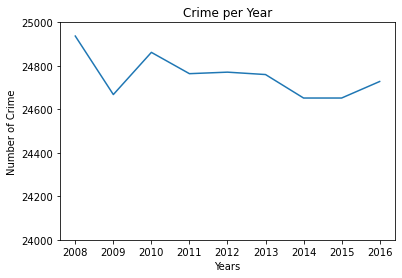

In [8]:
%matplotlib inline

import matplotlib as mlt
import matplotlib.pyplot as plt

Year['crime'].plot(kind='line')
plt.title('Crime per Year')
plt.ylim([24000, 25000])
plt.xlabel('Years')
plt.ylabel('Number of Crime')
# plt.text(2000, 6000, '2010 Earthquake') #plot text syntax = plt.text(x,y,'text')
plt.show()

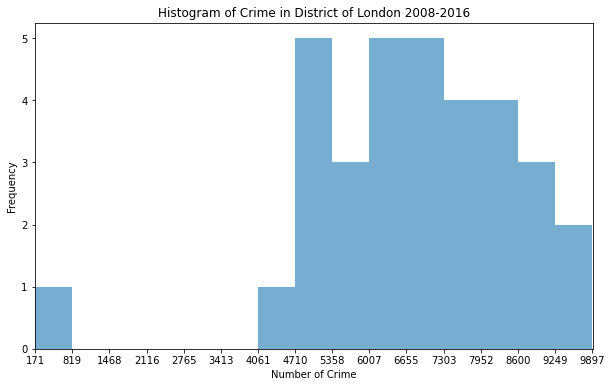

In [37]:
#Histogram of Crime in District
df_district = df.groupby(['district'],axis=0).count()
count, bin_edges = np.histogram(df_district['crime'],15)
xmin = bin_edges[0]-10
xmax =bin_edges[-1]+10
df_district['crime'].plot.hist(figsize=(10,6),
          bins = 15,
          alpha=0.6,
          xticks=bin_edges,
        stacked = True,
         xlim = (xmin,xmax)
     )
plt.title('Histogram of Crime in District of London 2008-2016')
plt.xlabel('Number of Crime')
plt.ylabel('Frequency')
plt.show()

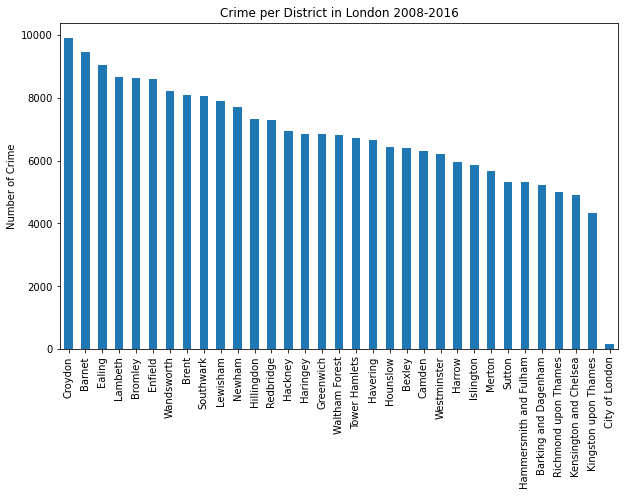

In [50]:
df_district.sort_values(by= 'crime', ascending=False, inplace= True)

df_district['crime'].plot(kind='bar', figsize =(10,6))
plt.xlabel('')
plt.ylabel('Number of Crime')
plt.title('Crime per District in London 2008-2016')
plt.show()

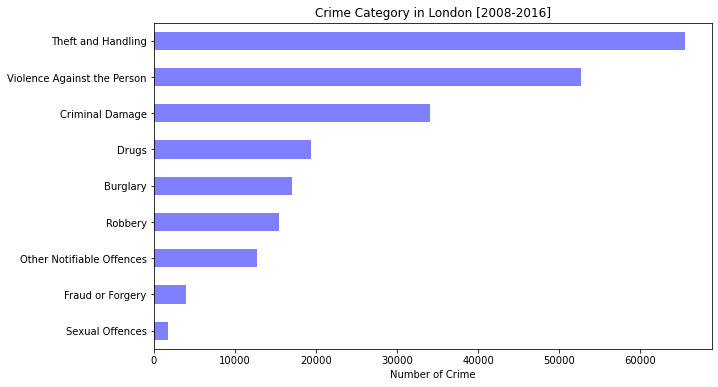

In [49]:
# Bar charts
df_crime = df.groupby(['crime'],axis=0).count()
df_crime.sort_values(by= 'district', ascending=True, inplace= True)

df_crime['district'].plot(kind='barh', figsize=(10, 6), color='blue', alpha=0.5)
plt.ylabel('')
plt.xlabel('Number of Crime')
plt.title('Crime Category in London [2008-2016]')
plt.show()

In [53]:
df_violence = df[(df['crime']== 'Violence Against the Person')]
df_violence = df_violence.groupby(['minor_category'],axis=0).count()
df_violence

,district,crime
minor_category,,
Assault with Injury,8800,8800
Common Assault,8704,8704
Harassment,8664,8664
Murder,1573,1573
Offensive Weapon,7827,7827
Other violence,8458,8458
Wounding/GBH,8678,8678


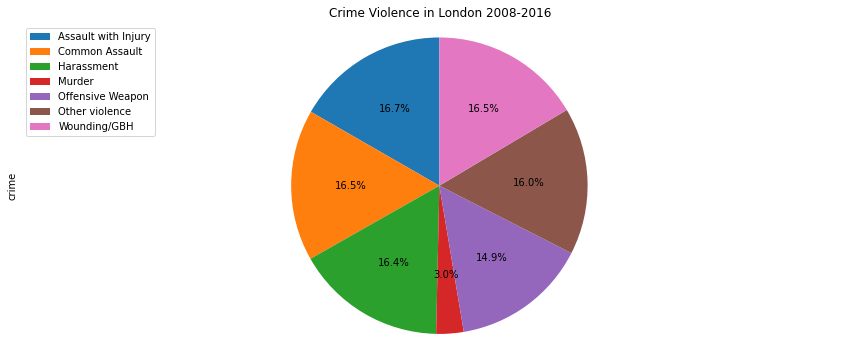

In [55]:

df_violence['crime'].plot(kind ='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%',
                            startangle=90,
                           labels = None
                           )
plt.title('Crime Violence in London 2008-2016')
plt.axis('equal')
plt.legend(labels= df_violence.index , loc= 'upper left')
plt.show()

In [56]:
drug = df[(df['crime']=='Drugs')]
drugs = drug.groupby(['year', 'district'],axis=0).count()
drugs

crime  minor_category
year district                                   
2008 Barking and Dagenham     53              53
     Barnet                   80              80
     Bexley                   57              57
     Brent                    99              99
     Bromley                  68              68
...                          ...             ...
2016 Sutton                   42              42
     Tower Hamlets            68              68
     Waltham Forest           65              65
     Wandsworth               67              67
     Westminster              67              67

[294 rows x 2 columns]

In [ ]:
pd.DataFrame(df['crime'].sum(axis=0))

In [ ]:
# Scatter plots
# drug = df[(df['crime']=='Drugs')]
# drug_year = drug.groupby(['year'], axis=0).count()
# drug_year
# df_drug = pd.DataFrame(drug_year['crime'].sum(axis=0))
# df_drug = map(int, df_drug)
# df_drug.reset_index(inplace=True)
# # df_tot.head()
# df_drug.columns=['year', 'crime']
# df_tot.head()

# df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6)).grid()
# plt.title('Total of Immigrants to Canada')
# plt.xlabel('Year')
# plt.ylabel('Number of Immigrants')
# plt.show()